## Statystyka i Analiza danych
# Zadanie domowe 
Mikołaj Pająk 148183 I6.2


# --------------------------------------
# Zadowolenie pasażerów linii lotniczych
Źródło: https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction?resource=download&select=airline_passenger_satisfaction.csv

Zbiór danych zawiera oceny zadowolenia klienta od ponad 120 000 pasażerów linii lotniczych. Dane zostały uzyskane na podstawie ankiet przeprowadzonych z pasażerami. Zbór zawiera informacje: 
+ o pasażerze, 
+ locie i rodzaju podróży, 
+ ocena różnych czynników, takich jak czystość, komfort, obsługa i ogólne wrażenia.

In [5]:
data <- read.csv("/content/airline_passenger_satisfaction.csv", header= TRUE, sep=",")

Dane, które zawiera zbiór:

In [6]:
colnames(data)

[1] "ID"                                    
 [2] "Gender"                                
 [3] "Age"                                   
 [4] "Customer.Type"                         
 [5] "Type.of.Travel"                        
 [6] "Class"                                 
 [7] "Flight.Distance"                       
 [8] "Departure.Delay"                       
 [9] "Arrival.Delay"                         
[10] "Departure.and.Arrival.Time.Convenience"
[11] "Ease.of.Online.Booking"                
[12] "Check.in.Service"                      
[13] "Online.Boarding"                       
[14] "Gate.Location"                         
[15] "On.board.Service"                      
[16] "Seat.Comfort"                          
[17] "Leg.Room.Service"                      
[18] "Cleanliness"                           
[19] "Food.and.Drink"                        
[20] "In.flight.Service"                     
[21] "In.flight.Wifi.Service"                
[22] "In.flight.Entertainment"               
[23] "Baggage.Handling"                      
[24] "Satisfaction"

W pierwszej kolejności zobaczmy jak prezentują się podstawowe dane. Zacznijmy od porównania ze sobą liczności kobiet oraz mężczyzn.


Female   Male 
 65899  63981 

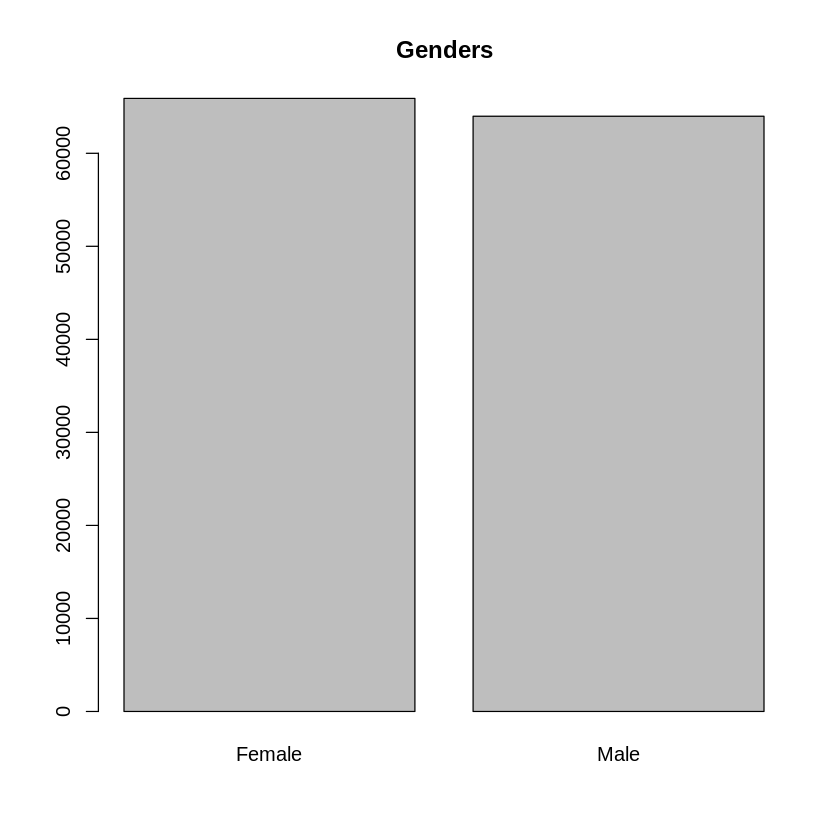

In [7]:
gender <- table(data$Gender)
gender
barplot(gender, main = "Genders")

Widzimy, że liczebność kobiet jest minimalnie większa niż mężczyzn. Sprawdźmy jak wyglądają statystyki opisowe związane z wiekiem pasażerów oraz histogram.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7.00   27.00   40.00   39.43   51.00   85.00 

Moda:  39
Odchylenie standardowe:  15.11936

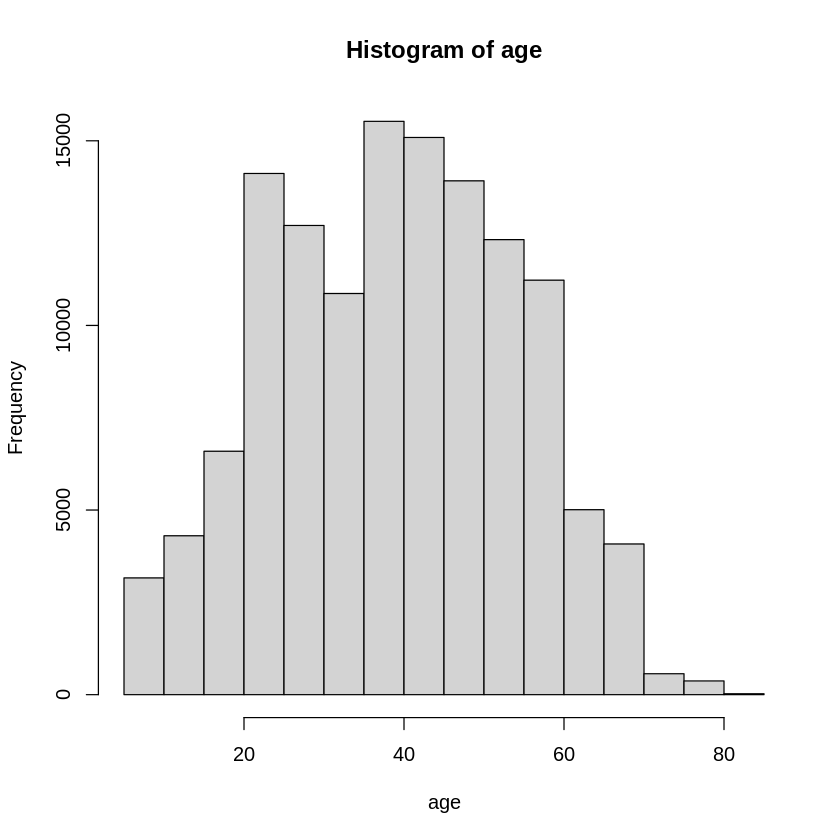

In [8]:
find_mode <- function(x) {
  u <- unique(x)
  tab <- tabulate(match(x, u))
  u[tab == max(tab)]
}

age <- data$Age
summary(age)
cat("Moda: ", find_mode(age))
cat("\nOdchylenie standardowe: ", sd(age))
hist(age)

Z histogramu wynika, że większość pasażerów jest w wieku między 20 a 60 rokiem życia. Dodatkowo mediana wieku jest bardzo zbliżona do śreniej arytmetycznej oraz mody. Zobaczmy jak wygląda podział pasażerów, patrząc na to czy jest to ich pierwszy lot czy powracający.


First-time  Returning 
     23780     106100 

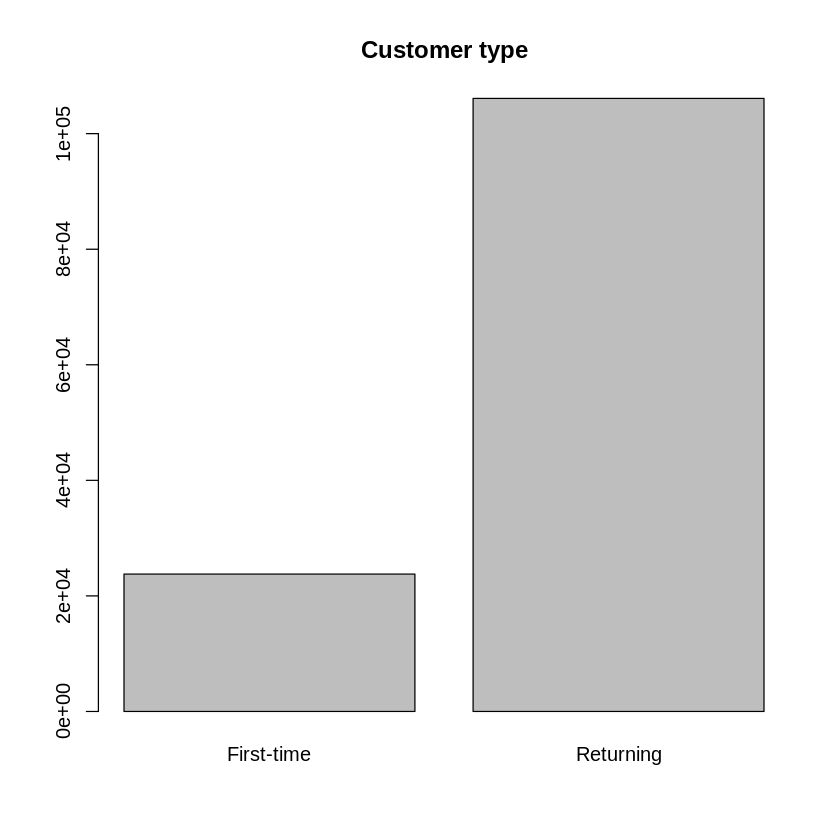

In [9]:
cust_type <- table(data$Customer.Type)
cust_type
barplot(cust_type, main = "Customer type")


Zauważamy prawie czterokrotnie większą przewagę osób wracających. Sprawdźmy w jakim celu pasażerowie odbywali podróże.


Business Personal 
   89693    40187 

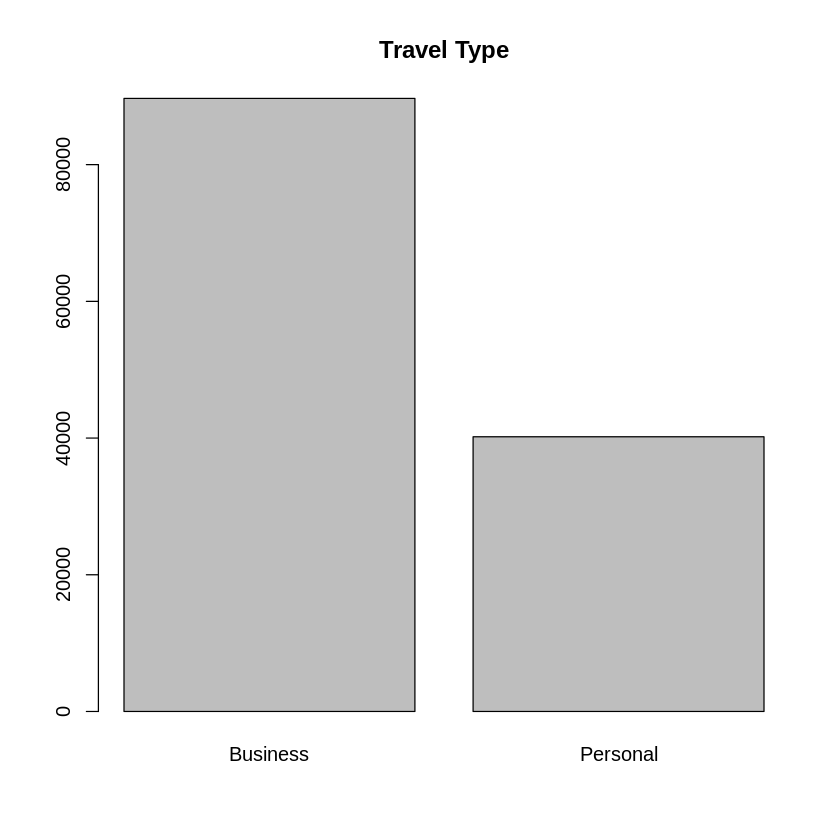

In [10]:
travel_type <- table(data$Type.of.Travel)
travel_type
barplot(travel_type, main = "Travel Type")

Wyniki mówią, że prawie dwa razy więcej osób podróżowało w celach biznesowych w porównaniu do podróży prywatnych. Teraz przyjrzyjmy się długości lotów.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     31     414     844    1190    1744    4983 

Moda:  337 km
Odchylenie standardowe:  997.4525 km

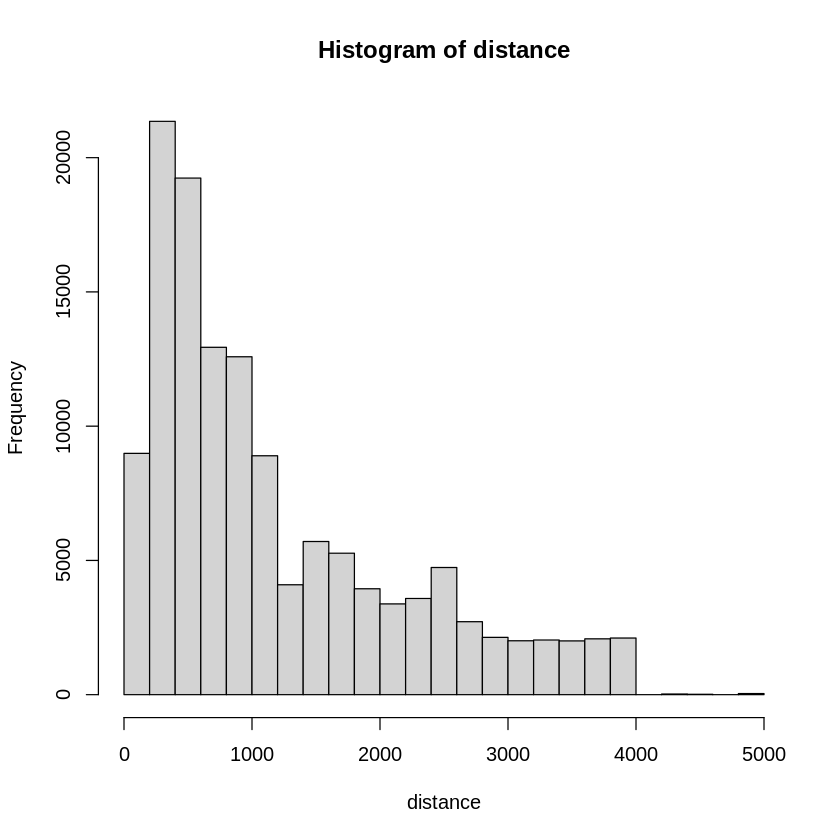

In [11]:
distance <- data$Flight.Distance 
summary(distance)
cat("Moda: ", find_mode(distance), "km")
cat("\nOdchylenie standardowe: ", sd(distance), "km")
hist(distance)

Duża liczba lotów odbyła się na dystansie w między 100 km, a 1100 km. Ciekawostką jest długość najkrótszej podróży, która wynosi zaledwie 31 km oraz najdłuższej podróży - 4983 km. Rozstęp więc wynosi aż 4952 km. Lecz nie jest to duża wartość gdybyśmy chcieli oblecieć Ziemię dookoła, ponieważ jej obwód wynosi ok. 40 tys. km. Teraz zaimplementujmy parę dodatkowych funkcji przydatnych do dalszej analizy.

In [12]:
# Wariancja dla populacji
pop_var <- function(dane) {
  mean((dane - mean(dane))^2)
}

# Moment centralny k-tego rzędu
moment_centralny <- function(dane, k) {
  mean((dane - mean(dane))^k)
}

# Sigma obciążona
sigma_obciazona <- function(wariancja, k) {
  wariancja^(k/2)
}

# Współczynnik asymetrii (skośność)
skosnosc <- function(mom, si) {
  mom/si
}

# Współczynnik wyostrzenia (kurtoza)
kurtoza <- function(mom, si) {
  mom/si
}

Zobaczmy jakie wartości ma skośność $A = \frac{M_3}{s^3}$ oraz kurtoza $K = \frac{M_4}{s^4}$ dla wieku i dystansu

In [13]:
cat("Wiek", "\nSkośność: ", skosnosc(moment_centralny(age, 3), sigma_obciazona(pop_var(age), 3)), 
    "\nKurtoza: ", kurtoza(moment_centralny(age, 4), sigma_obciazona(pop_var(age), 4)))
cat("\n#######################################")
cat("\nDystans", "\nSkośność: ", skosnosc(moment_centralny(distance, 3), sigma_obciazona(pop_var(distance), 3)), 
    "\nKurtoza: ", kurtoza(moment_centralny(distance, 4), sigma_obciazona(pop_var(distance), 4)))

Wiek 
Skośność:  -0.00360617 
Kurtoza:  2.280841
#######################################
Dystans 
Skośność:  1.10813 
Kurtoza:  3.265446

Widzimy, że skośność dla wieku jest bliska zeru co może wskazywać na prawie symetryczny szereg. Natomiast dla dystansu współczynnik asymetrii jest od zera większy, pokazuje to asymetrie prawostronną szeregu co potwierdza wykres. Kurtoza w obydwu przypadkach jest większa od zera. Możemy wywnioskować z tego, że wykres szeregu jest bardziej wysmukły niż normalny (rozkład leptokurtyczny). Zmienne bardziej skupiają się wokół średniej. Przyjrzyjmy się teraz bliżej wieku pasażerów. Zbadamy obciążenie estymatorów średniej oraz wariancji.

In [14]:
# Przygotowanie prób
n <- length(data$ID)
r_proby  <- 100
l_prob  <- 200
losowe_indeksy  <- sample(1:n, size=r_proby*l_prob, replace=TRUE)
proby  <- matrix(data$Age[losowe_indeksy], r_proby, l_prob, byrow = TRUE)
colnames(proby)  <- paste(rep("próba",ncol(proby)),c(1:ncol(proby)))

Obliczmy średnią, wariancję oraz odchylenie standardowe dla populacji.

In [15]:
p_mean <- mean(data$Age)
p_var <- pop_var(data$Age)
p_sd <- sqrt(p_var)
opis_popul  <- c("średnia"=p_mean, "wariancja"=p_var, "odchylenie standardowe"=p_sd)
opis_popul

średnia              wariancja odchylenie standardowe 
              39.42796              228.59329               15.11930

Dla każdej próby wyznaczamy estymator średniej, estymator wariancji oraz obciążoną wersję estymatora wariancji. Następnie dla każdego z estymatorów wyznaczamy wartość oczekiwaną (uśredniając po próbach) oraz obciążenie:

In [16]:
estymator_srednia  <- apply(proby, 2, mean)
estymator_wariancja  <- apply(proby, 2, var) # funkcja var daje nam estymator nieobciążony
obciazony_estymator_wariancja  <- apply(proby, 2, pop_var)


wiersze  <- c("Wartość oczekiwana", "Obciążenie")
kolumny  <- c("Estymator średnia", "Estymator wariancja", "Estymator obciążony wariancja")

wartosci_oczekiwane  <- c(mean(estymator_srednia), mean(estymator_wariancja), mean(obciazony_estymator_wariancja))
obciazenia  <- c(wartosci_oczekiwane[1] - opis_popul[1], wartosci_oczekiwane[2] - opis_popul[2], wartosci_oczekiwane[3] - opis_popul[2])  

matrix(c(rbind(wartosci_oczekiwane, obciazenia)), length(wiersze), length(kolumny), dimnames=list(wiersze, kolumny))

,Estymator średnia,Estymator wariancja,Estymator obciążony wariancja
Wartość oczekiwana,39.3100000,229.2598879,226.967289
Obciążenie,-0.1179566,0.6666026,-1.625996


Możemy zauważyć, że estymator nieobciążony ma większą wariancję, co oznacza, że jest mniej skupiony. Natomiast jego obciążenie jest zdecydowanie mniejsze względem estymatora obciążonego. Teraz wyświetlmy wykres dla estymatora średniej.

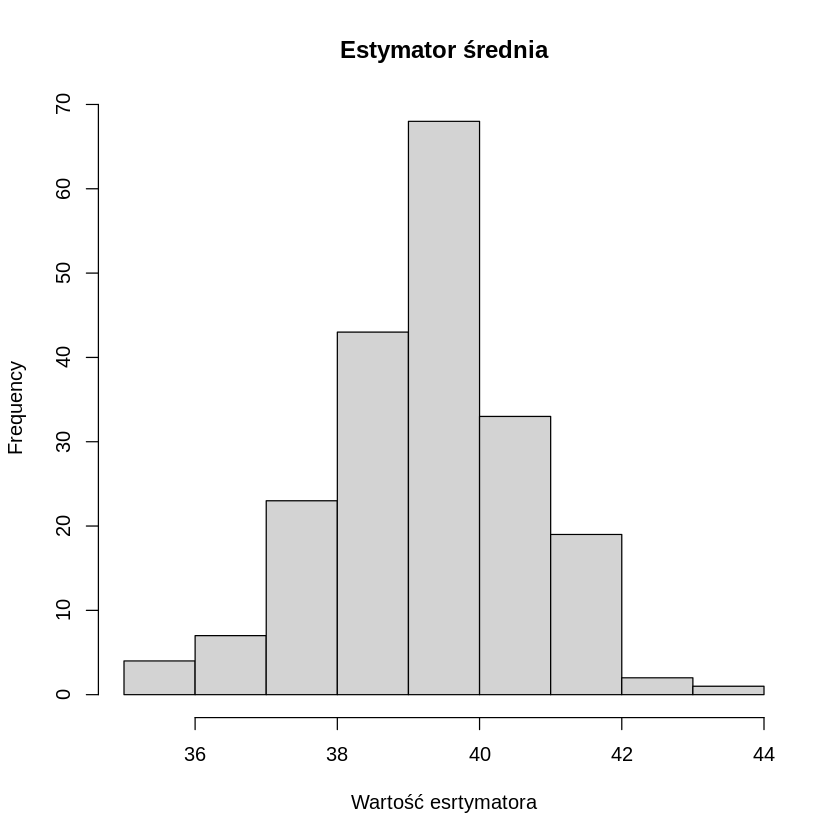

In [17]:
hist(estymator_srednia, main="Estymator średnia", xlab = "Wartość esrtymatora")

Możemy stwierdzić, że w przybliżeniu ten rozkład jest normalny. Mówi o tym również Centralne Twierdzenie Graniczne. Zajmijmy się teraz badaniem estymacji przedziałowej dla płci. Przyjmijmy, że jest to rozkład dwupunktowy `B(p)`

`kobieta - 1` 

`mężczyzna - 0`


In [18]:
# Tworzymy wektor z wartościami 0 i 1
g <- c()
for (gen in data$Gender) {
  if (gen == "Male") {
    g <- append(g, 0)
  } else
    g <- append(g, 1)
}



Załóżmy, że prawdopodobieństwo, że uczestnikiem lotu jest kobieta albo mężczyzna jest takie same i wynosi `0.5`. Wykonamy teraz test frakcji (dwustronny), na próbie liczącej 1000 osób, aby przekonać się, czy jest po równo kobiet i mężczyzn. Rozważamy zatem następujący układ hipotez, gdzie $p_0=0.5$:
* $H_0: \hat{P} = p_0$
* $H_1: \hat{P} \neq p_0$ 

In [19]:
# Generujemy próbę
losowe_indeksy  <- sample(1:length(g), size=1000)
proba_g <- c(g[losowe_indeksy])

In [20]:
n <- 1000
p0 <- 0.5

Sprawdzamy, czy możemy przybliżyć rozkład dwupunktowy rozkładem normalnym (Centralne Twierdzenie Graniczne), tzn. czy spełnione są wymagania:
* $n*p_0 \ge 5$
* $n*q_0 = n*(1-p_0) \ge 5$

In [21]:
n * p0 >= 5
n * (1 - p0) >= 5

[1] TRUE

[1] TRUE

Przyjmujemy typowy poziom istotności $\alpha$.

In [22]:
alpha  <- 0.05

Wyznaczamy frakcję z próby ($\hat{p}$):

In [23]:
p_hat  <- mean(proba_g)
p_hat

[1] 0.485

Wyznaczamy też wartość statystyki testowej $Z=\frac{\hat{p}-p_{o}}{\sqrt{p_{0}(1-p_{o})}}\sqrt{n}$.

In [24]:
z  <- ((p_hat - p0) / sqrt(p0 * (1 - p0))) * sqrt(n)
z

[1] -0.9486833

Wyznaczamy teraz wartość krytyczną na podstawie przyjętego poziomu istotności:

In [25]:
z_crit  <- qnorm(1 - alpha/2)
z_crit

[1] 1.959964

Zaimplementujmy pomocniczą funkcję do stworzenia wykresu

In [26]:
plot_norm  <- function(z, z_crit) {
    x_max  <- max(3, abs(z))
    x  <- seq(-x_max, x_max, 0.1)
    y  <- dnorm(x)
    plot(x, y, type="l")
    abline(v = z, col="blue", lty=2)
    for (zc in z_crit) {
        if (zc > 0) {
            x_c  <- c(zc, zc, x[x > zc], max(x))
            y_c  <- c(0, dnorm(zc), y[x > zc], 0) 
        } else {
            x_c  <- c(min(x), x[x < zc], zc, zc)
            y_c  <- c(0, y[x < zc], dnorm(zc), 0)             
        }
        polygon(x_c, y_c, border=NA, col="firebrick1")
    }
}

Narysujmy wykres:

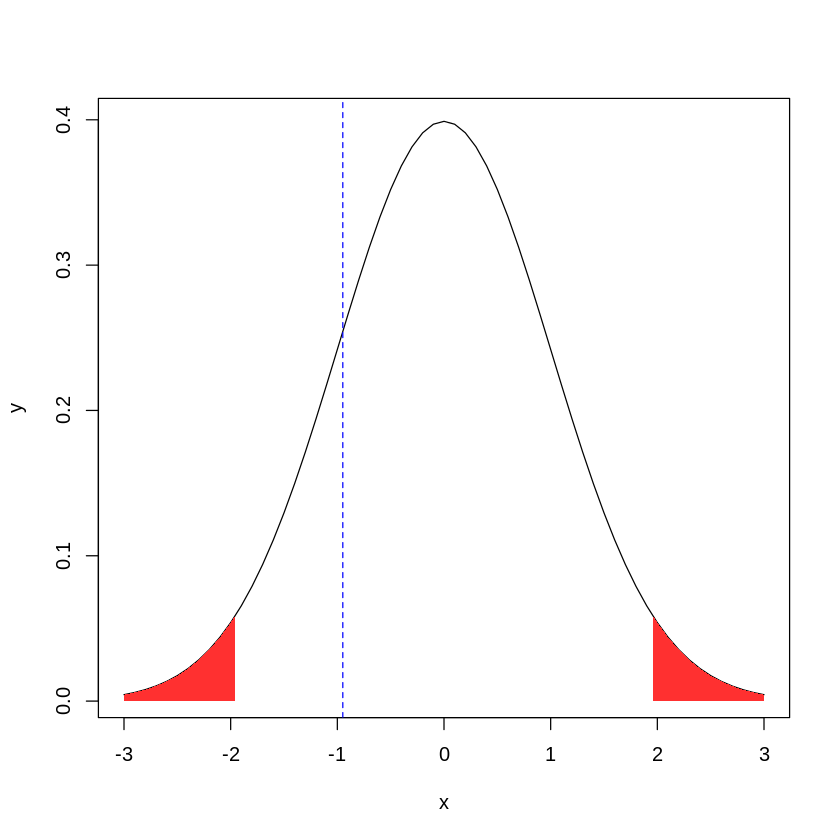

In [27]:
plot_norm(z, c(-z_crit, z_crit))

Po przeanalizowaniu wyników oraz wykresu, możemy przyjąć $H_0: \hat{P} = p_0$. Teraz wykonajmy test Z na danych dotyczących wieku podróżujących. Średni wiek pasażera w populacji wynosi 39.43 lat. Sprawdźmy czy mężczyźni charakteryzują się większą ilością przeżytych wiosen. Wybierzmy losowo 100 mężczyzn i zbadamy ich wiek. Za poziom istotności przyjmijmy $\alpha = 0.01$ i przyjmijmy, że wiek pasażerów ma rozkład normalny (CTG).
* $H_0: \hat{P} = 39.43$
* $H_1: \hat{P} \gt 39.43$ 

In [30]:
# Wyszukanie wszystkich odległości, które przebyli mężczyźni
a <- c()
for (i in 1:length(data$ID)) {
  if (data$Gender[i] == "Male")
    a <- append(a, data$Age[i])
}

# Generujemy próbę
losowe_indeksy  <- sample(1:length(a), size=100)
proba_a <- c(a[losowe_indeksy])

Zobaczmy w ramach ciekawoski jak prezentuje się histogram próby:

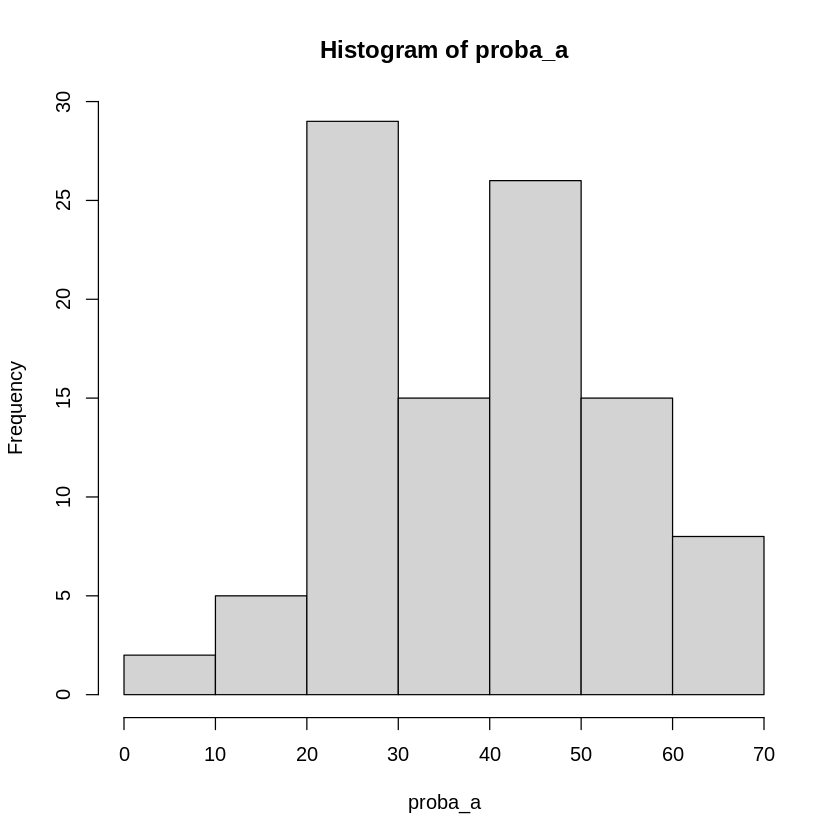

In [32]:
hist(proba_a)

Obliczmy teraz średnią w próbie oraz odchylenie standardowe w populacji

Średnia populacji: 39.43 
Średnia w probie: 39.566 
Odchylenie standardowe w populacji: 15.1193 
Watrość statystyki 	 0.0899487 
Obszar krytyczny: ( 2.326348 ; inf)


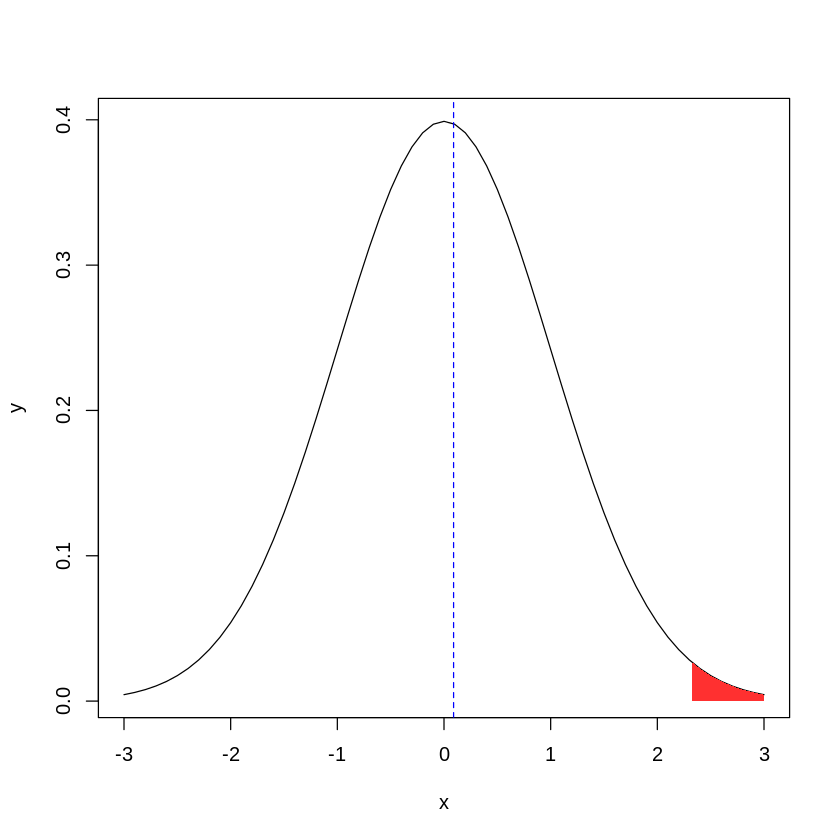

In [34]:
# Dane
srednia_pop <- 39.43
srednia_proba_a <- mean(a)
sd_pop <- sqrt(pop_var(data$Age))
cat("Średnia populacji:", srednia_pop, "\n")
cat("Średnia w probie:", srednia_proba_a, "\n")
cat("Odchylenie standardowe w populacji:", sd_pop, "\n")
alpha <- 0.01

# Test Z
alpha <- 1-alpha
Z <- (srednia_proba_a - srednia_pop) / (sd_pop / sqrt(length(proba_a)))
z_crit  <- qnorm(alpha)
cat("Watrość statystyki \t", Z, "\n")
cat("Obszar krytyczny: (", z_crit, "; inf)\n")
plot_norm(Z, c(z_crit))

Jak widać nie mamy podstaw do odrzucenia hipotezy zerowej. Czyli stwierdzenie, że mężczyźni są zwykle starsi jest nieprawdziwe.

##Podsumowanie

Zbiór danych zawiera wiele podzbiorów, na których możemy przeprowadzać rozmaite badania statystyczne. Wybrałem przedstawienie podstawowych statystyk na różnych podzbiorach, pokazanie szeregów rozdzielczych, analizę estymatorów, wykonanie testu frakcji oraz testu Z. Nie zauważyłem wyników, których się nie spodziewałem. Moja propozycja dalszego rozwoju badań to sprawdzanie korelacji między innymi danymi w zbiorze danych.